# Data Preprocessing

Note this document takes 7 mins to run with run all 

## functions being used in the code NEED TO BE RUN FIRST

In [1]:
from sklearn.metrics import fbeta_score, make_scorer
#Data Labeling
def PutInFlag(df):
    new_column = []
    a=False
    for i in df.index:
        a=False
        if ((df.loc[i]['X']>=15) | (df.loc[i]['X']<=-21)):
            a=True
        elif ((df.loc[i]['Y']>=15) | (df.loc[i]['Y']<=-21)):
            a=True
        elif ((df.loc[i]['Z']>=18) | (df.loc[i]['Z']<=-21)):
            a=True
        if a==True:
            new_column.append(1)
        else:
            new_column.append(0)
    df['fall'] = new_column
import math
def new_Feature(df):
    alpha = []
    X_Z=[]
    Z_angle=[]
    G_angle=[]

    for i in df.index:
        alpha.append( math.sqrt(df.loc[i]['X']**2+df.loc[i]['Y']**2+df.loc[i]['Z']**2))
        X_Z.append( math.sqrt(df.loc[i]['X']**2+df.loc[i]['Z']**2))
        Z_angle.append( math.atan2(math.sqrt(df.loc[i]['X']**2+df.loc[i]['Y']**2),df.loc[i]['Z']))
        G_angle.append(math.acos(df.loc[i]['Z']/(math.sqrt(df.loc[i]['X']**2+df.loc[i]['Z']**2))))
    df['alpha']=alpha
    df['X_Z']=X_Z
    df['Z_angle']=Z_angle
    df['G_angle']=G_angle
def roll(df):
    rx=[]
    ry=[]
    rz=[]
    ralpha = []
    rX_Z=[]
    rZ_angle=[]
    rG_angle=[]
    #rolling avg
    for i in range(len(df)-5):
        rx.append((df.loc[i]['X']+df.loc[i+1]['X']+df.loc[i+2]['X']+df.loc[i+3]['X']+df.loc[i+4]['X'])/5)
        ry.append((df.loc[i]['Y']+df.loc[i+1]['Y']+df.loc[i+2]['Y']+df.loc[i+3]['Y']+df.loc[i+4]['Y'])/5)
        rz.append((df.loc[i]['Z']+df.loc[i+1]['Z']+df.loc[i+2]['Z']+df.loc[i+3]['Z']+df.loc[i+4]['Z'])/5)
        ralpha.append((df.loc[i]['alpha']+df.loc[i+1]['alpha']+df.loc[i+2]['alpha']+df.loc[i+3]['alpha']+df.loc[i+4]['alpha'])/5)
        rX_Z.append((df.loc[i]['X_Z']+df.loc[i+1]['X_Z']+df.loc[i+2]['X_Z']+df.loc[i+3]['X_Z']+df.loc[i+4]['X_Z'])/5 )
        rZ_angle.append((df.loc[i]['Z_angle']+df.loc[i+1]['Z_angle']+df.loc[i+2]['Z_angle']+df.loc[i+3]['Z_angle']+df.loc[i+4]['Z_angle'])/5)
        rG_angle.append((df.loc[i]['G_angle']+df.loc[i+1]['G_angle']+df.loc[i+2]['G_angle']+df.loc[i+3]['G_angle']+df.loc[i+4]['G_angle'])/5)
    #
    for i in range(0,5):
        rx.append(0)
        ry.append(0)
        rz.append(0)
        ralpha.append(0)
        rX_Z.append(0)
        rZ_angle.append(0)
        rG_angle.append(0)
    df['rx']=rx
    df['ry']=ry
    df['rz']=rz
    df['ralpha']=ralpha
    df['rX_Z']=rX_Z
    df['rZ_angle']=rZ_angle
    df['rG_angle']=rG_angle
    

# Function for Negative Precision scoring    
    
def custom_scoring_function(y_true, y_pred):
    confus=confusion_matrix(y_true, y_pred)
    return confus[1][1]/(confus[1][1]+confus[1][0])
  

# Data

# Only with training data

In [2]:
#warnings.filterwarnings('ignore')
import math
from statistics import mean
import pandas as pd

Df1= pd.read_csv('project/fall 1.csv')
Df2= pd.read_csv('project/fall2tv.csv')
Df3= pd.read_csv('project/fall_tamara.csv')
Df4= pd.read_csv('project/fallchair1.csv')
Df5= pd.read_csv('project/falldrop1.csv')
Df6= pd.read_csv('project/fallhigh1.csv')
Df7= pd.read_csv('project/fallD.csv')
Df8= pd.read_csv('project/fallA.csv')
Df9= pd.read_csv('project/fallS.csv')
Df10= pd.read_csv('project/fallW.csv')
Df11= pd.read_csv('project/fallWD.csv')
Df12= pd.read_csv('project/fallWA.csv')
Df13= pd.read_csv('project/fallSA.csv')
Df14= pd.read_csv('project/fallSD.csv')
Df15= pd.read_csv('project/pick-up_down1.csv')
Df16= pd.read_csv('project/pick-up_down2.csv')
Df17= pd.read_csv('project/pick-up_down3.csv')
Df19= pd.read_csv('project/WASD.csv')
Df18= pd.read_csv('project/sensorlog_20230324_102158.csv') #my fall
Df20 =pd.read_csv("project/slowfall3.csv")
Df21 =pd.read_csv("project/slowfall1.csv")
Df22 =pd.read_csv("project/slowfall2.csv")
Df23 =pd.read_csv("project/pickup1.csv")
Df24 =pd.read_csv("project/pickup2.csv")
Df25 =pd.read_csv("project/pickup3.csv")
Df26 =pd.read_csv("project/laying1.csv")
Df27 =pd.read_csv("project/laying2.csv")
Df28 =pd.read_csv("project/laying3.csv")
Df29 =pd.read_csv("project/sitdown1.csv")
Df30 =pd.read_csv("project/sitdown2.csv")
Df31 =pd.read_csv("project/sitdown3.csv")
Df36= pd.read_csv('project/stairs1.csv')
Df37= pd.read_csv('project/stairs2.csv')
Df40= pd.read_csv('project/walk_downstairs.csv')
Df41= pd.read_csv('project/walk_stairs.csv')

PutInFlag(Df1)
PutInFlag(Df2)
PutInFlag(Df3)
PutInFlag(Df4)
PutInFlag(Df5)
PutInFlag(Df6)
PutInFlag(Df7)
PutInFlag(Df8)
PutInFlag(Df9)
PutInFlag(Df10)
PutInFlag(Df11)
PutInFlag(Df12)
PutInFlag(Df13)
PutInFlag(Df14)
Df15['fall']=0
Df16['fall']=0
Df17['fall']=0
Df19['fall']=0
PutInFlag(Df36)
PutInFlag(Df37)
PutInFlag(Df40)
PutInFlag(Df41)
PutInFlag(Df20)
PutInFlag(Df21)
PutInFlag(Df22)
PutInFlag(Df23)
PutInFlag(Df24)
PutInFlag(Df25)
PutInFlag(Df26)
PutInFlag(Df27)
PutInFlag(Df28)
PutInFlag(Df29)
PutInFlag(Df30)
PutInFlag(Df31)
Df22[218:237]['fall']=1
Df20[153:167]['fall']=1
Df18=Df18[0:600]
Df18['fall']=0
Df18.loc[529]['fall']=1
df = pd.concat([Df1,Df2,Df3,Df4,Df5,Df6,Df7,Df8,Df9,Df10,Df11,Df18,Df36,Df37,Df40,Df41,Df12,Df13,Df14,Df15,Df16,Df17,Df19,Df21,Df23,Df24,Df25,Df26,Df27,Df28,Df29,Df30,Df31], axis = 0, ignore_index = True)
from datetime import datetime
import pandas as pd

# convert the Timestamp column to a number
df['Timestamp'] = df['Timestamp'].apply(lambda x: datetime.strptime(x, '%d-%b-%Y %H:%M:%S.%f').timestamp())


<ipython-input-2-c2b7cdaeb9cf>:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df22[218:237]['fall']=1
<ipython-input-2-c2b7cdaeb9cf>:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df20[153:167]['fall']=1
<ipython-input-2-c2b7cdaeb9cf>:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df18.loc[529]['fall']=1


In [3]:
new_Feature(df)

In [4]:
df

Timestamp         X         Y         Z  fall     alpha       X_Z  \
0      1.679668e+09 -6.516852 -7.340582 -0.189033     0  9.817802  6.519593   
1      1.679668e+09 -6.520442 -7.341180 -0.266202     0  9.822421  6.525874   
2      1.679668e+09 -6.553941 -7.241280 -0.278764     0  9.770772  6.559867   
3      1.679668e+09 -6.513862 -7.313663 -0.272782     0  9.797677  6.519571   
4      1.679668e+09 -6.468398 -7.344171 -0.267996     0  9.790242  6.473947   
...             ...       ...       ...       ...   ...       ...       ...   
17233  1.682353e+09 -4.561913 -7.761660  3.718268     0  9.740633  5.885284   
17234  1.682353e+09 -4.571943 -7.813602  3.670667     0  9.768768  5.863144   
17235  1.682353e+09 -4.561165 -7.800728  3.733686     0  9.777320  5.894458   
17236  1.682353e+09 -4.571494 -7.777976  3.746858     0  9.769054  5.910795   
17237  1.682353e+09 -4.583618 -7.782466  3.761528     0  9.783937  5.929473   

        Z_angle   G_angle  
0      1.590052  1.599795  
1      1.597901  1.611599  
2      1.599331  1.613305  
3      1.598641  1.612649  
4      1.598174  1.612204  
...         ...       ...  
17233  1.179132  0.886935  
17234  1.185585  0.894309  
17235  1.178975  0.884827  
17236  1.177166  0.884210  
17237  1.176174  0.883592  

[17238 rows x 9 columns]

this is for future work if people would like to use this rolling aggrations of data they can 

In [5]:
#roll(df)
#df

# Data Analysis

In [6]:
#Feaures and target
X = df.drop(['fall','Timestamp'], axis = 1).to_numpy()
y = df['fall'].to_numpy()

In [7]:
# 70/30 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=90)

In [8]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models with default parameters and all of the parameters

# SVC

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix


# Fit the SVM model on the scaled data
svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(X_train_scaled, y_train)

# Evaluate the model with cross-validation
y_pred = svm.predict(X_test_scaled)
confus=confusion_matrix(y_test, y_pred)
print(confus)
print('Accuracy: '+str((confus[0][0]+confus[1][1])/(confus[0][0]+confus[0][1]+confus[1][0]+confus[1][1])))
print('Misclassification Rate: '+str((confus[0][1]+confus[1][0])/(confus[0][0]+confus[0][1]+confus[1][0]+confus[1][1])))
print('Precision: '+str(confus[0][0]/(confus[0][0]+confus[0][1])))
print('Negtaive Precision: '+str(confus[1][1]/(confus[1][1]+confus[1][0])))

[[5162    0]
 [   5    5]]
Accuracy: 0.9990332559938129
Misclassification Rate: 0.0009667440061871616
Precision: 1.0
Negtaive Precision: 0.5


# XGBoost

In [10]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
# XGBoost model
xgb_model = xgb.XGBClassifier(max_depth=3, learning_rate=.92, n_estimators=200, random_state=42)

# Fit the model on the scaled training data
xgb_model.fit(X_train_scaled, y_train)

# Evaluate the model with cross-validation
y_pred = xgb_model.predict(X_test_scaled)
confus=confusion_matrix(y_test, y_pred)
print(confus)
print('Accuracy: '+str((confus[0][0]+confus[1][1])/(confus[0][0]+confus[0][1]+confus[1][0]+confus[1][1])))
print('Misclassification Rate: '+str((confus[0][1]+confus[1][0])/(confus[0][0]+confus[0][1]+confus[1][0]+confus[1][1])))
print('Precision: '+str(confus[0][0]/(confus[0][0]+confus[0][1])))
print('Negtaive Precision: '+str(confus[1][1]/(confus[1][1]+confus[1][0])))

/home/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:18:50] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[5161    1]
 [   2    8]]
Accuracy: 0.9994199535962877
Misclassification Rate: 0.000580046403712297
Precision: 0.9998062766369624
Negtaive Precision: 0.8


# DTC

In [11]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_scaled, y_train)
y_pred = classifier.predict(X_test_scaled)
from sklearn.metrics import classification_report, confusion_matrix
confus=confusion_matrix(y_test, y_pred)
print(confus)
print('Accuracy: '+str((confus[0][0]+confus[1][1])/(confus[0][0]+confus[0][1]+confus[1][0]+confus[1][1])))
print('Misclassification Rate: '+str((confus[0][1]+confus[1][0])/(confus[0][0]+confus[0][1]+confus[1][0]+confus[1][1])))
print('Precision: '+str(confus[0][0]/(confus[0][0]+confus[0][1])))
print('Negtaive Precision: '+str(confus[1][1]/(confus[1][1]+confus[1][0])))

[[5161    1]
 [   3    7]]
Accuracy: 0.9992266047950503
Misclassification Rate: 0.0007733952049497294
Precision: 0.9998062766369624
Negtaive Precision: 0.7


# Feature Importance

# RFE with Logistic regression

In [12]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
rfe = RFE(model, 4)
fit_rfe = rfe.fit(X, y)
print(("Num Features: %d") % fit_rfe.n_features_)
print(("Selected Features: %s") % fit_rfe.support_)
print(("Feature Ranking: %s") % fit_rfe.ranking_)

/home/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Num Features: 4
Selected Features: [False False  True  True False  True  True]
Feature Ranking: [4 2 1 1 3 1 1]


In [13]:
import matplotlib.pyplot as plt
columns = ['X', 'Y', 'Z', 'alpha', 'X_Z', 'Z_angle', 'G_angle']

feature_weights = dict(zip(columns, fit_rfe.ranking_))
# Sort the feature weights in descending order
sorted_weights = sorted(feature_weights.items(), key=lambda x: x[1])
sorted_columns = [x[0] for x in sorted_weights]
sorted_ranks = [x[1] for x in sorted_weights]

print("Feature Weights (Ascending Order):")
for feature, weight in sorted_weights:
    print(feature,":",
          weight)

# Plot the feature weights in descending order
plt.bar(sorted_columns, sorted_ranks)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

Feature Weights (Ascending Order):
Z : 1
alpha : 1
Z_angle : 1
G_angle : 1
Y : 2
X_Z : 3
X : 4


# Models with top scored set parameters from feature importance RFE with Logistic regression

In [14]:
X1 = df[['Z','alpha','Z_angle','G_angle']].to_numpy()

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.30, random_state=90)

X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix


# Fit the SVM model on the scaled data
svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(X1_train_scaled, y_train)

# Evaluate the model with cross-validation
y_pred = svm.predict(X1_test_scaled)
confus=confusion_matrix(y_test, y_pred)
print(confus)
print('Accuracy: '+str((confus[0][0]+confus[1][1])/(confus[0][0]+confus[0][1]+confus[1][0]+confus[1][1])))
print('Misclassification Rate: '+str((confus[0][1]+confus[1][0])/(confus[0][0]+confus[0][1]+confus[1][0]+confus[1][1])))
print('Precision: '+str(confus[0][0]/(confus[0][0]+confus[0][1])))
print('Negtaive Precision: '+str(confus[1][1]/(confus[1][1]+confus[1][0])))

[[5162    0]
 [  10    0]]
Accuracy: 0.9980665119876256
Misclassification Rate: 0.0019334880123743233
Precision: 1.0
Negtaive Precision: 0.0


In [16]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
# XGBoost model
xgb_model = xgb.XGBClassifier(max_depth=3, learning_rate=.92, n_estimators=200, random_state=42)

# Fit the model on the scaled training data
xgb_model.fit(X1_train_scaled, y_train)

# Evaluate the model with cross-validation
y_pred = xgb_model.predict(X1_test_scaled)
confus=confusion_matrix(y_test, y_pred)
print(confus)
print('Accuracy: '+str((confus[0][0]+confus[1][1])/(confus[0][0]+confus[0][1]+confus[1][0]+confus[1][1])))
print('Misclassification Rate: '+str((confus[0][1]+confus[1][0])/(confus[0][0]+confus[0][1]+confus[1][0]+confus[1][1])))
print('Precision: '+str(confus[0][0]/(confus[0][0]+confus[0][1])))
print('Negtaive Precision: '+str(confus[1][1]/(confus[1][1]+confus[1][0])))

[19:18:53] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[[5162    0]
 [   5    5]]
Accuracy: 0.9990332559938129
Misclassification Rate: 0.0009667440061871616
Precision: 1.0
Negtaive Precision: 0.5


In [17]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X1_train_scaled, y_train)
y_pred = classifier.predict(X1_test_scaled)
from sklearn.metrics import classification_report, confusion_matrix
confus=confusion_matrix(y_test, y_pred)
print(confus)
print('Accuracy: '+str((confus[0][0]+confus[1][1])/(confus[0][0]+confus[0][1]+confus[1][0]+confus[1][1])))
print('Misclassification Rate: '+str((confus[0][1]+confus[1][0])/(confus[0][0]+confus[0][1]+confus[1][0]+confus[1][1])))
print('Precision: '+str(confus[0][0]/(confus[0][0]+confus[0][1])))
print('Negtaive Precision: '+str(confus[1][1]/(confus[1][1]+confus[1][0])))

[[5160    2]
 [   4    6]]
Accuracy: 0.9988399071925754
Misclassification Rate: 0.001160092807424594
Precision: 0.9996125532739248
Negtaive Precision: 0.6


# Feature importance with Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score


# This line instantiates the model. 
rf = RandomForestClassifier() 

# Fit the model on your training data.
rf.fit(X_train, y_train) 
y_predict = rf.predict(X_test)

# And score it on your testing data.

accuracy_score(y_test, y_predict)

columns=['rx','ry','rz','ralpha','rX_Z','rZ_angle', 'rG_angle']
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index=columns,
                                   columns=['importance'])
sorted_feature_importances = feature_importances.sort_values('importance', ascending=False)
print(sorted_feature_importances)
plt.bar(sorted_feature_importances.index, sorted_feature_importances['importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

          importance
rX_Z        0.255764
ralpha      0.240033
ry          0.174059
rz          0.152810
rx          0.103099
rG_angle    0.037482
rZ_angle    0.036754


# Models with top scored set parameters from feature importance Random forest

In [19]:
X2 = df[['X','Y','Z','alpha','X_Z']].to_numpy()

X2_train, X2_test, y_train, y_test = train_test_split(X1, y, test_size=0.30, random_state=90)

X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix


# Fit the SVM model on the scaled data
svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(X2_train_scaled, y_train)

# Evaluate the model with cross-validation
y_pred = svm.predict(X2_test_scaled)
confus=confusion_matrix(y_test, y_pred)
print(confus)
print('Accuracy: '+str((confus[0][0]+confus[1][1])/(confus[0][0]+confus[0][1]+confus[1][0]+confus[1][1])))
print('Misclassification Rate: '+str((confus[0][1]+confus[1][0])/(confus[0][0]+confus[0][1]+confus[1][0]+confus[1][1])))
print('Precision: '+str(confus[0][0]/(confus[0][0]+confus[0][1])))
print('Negtaive Precision: '+str(confus[1][1]/(confus[1][1]+confus[1][0])))

[[5162    0]
 [  10    0]]
Accuracy: 0.9980665119876256
Misclassification Rate: 0.0019334880123743233
Precision: 1.0
Negtaive Precision: 0.0


In [21]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
# XGBoost model
xgb_model = xgb.XGBClassifier(max_depth=3, learning_rate=.92, n_estimators=200, random_state=42)

# Fit the model on the scaled training data
xgb_model.fit(X2_train_scaled, y_train)

# Evaluate the model with cross-validation
y_pred = xgb_model.predict(X2_test_scaled)
confus=confusion_matrix(y_test, y_pred)
print(confus)
print('Accuracy: '+str((confus[0][0]+confus[1][1])/(confus[0][0]+confus[0][1]+confus[1][0]+confus[1][1])))
print('Misclassification Rate: '+str((confus[0][1]+confus[1][0])/(confus[0][0]+confus[0][1]+confus[1][0]+confus[1][1])))
print('Precision: '+str(confus[0][0]/(confus[0][0]+confus[0][1])))
print('Negtaive Precision: '+str(confus[1][1]/(confus[1][1]+confus[1][0])))

[19:18:54] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[[5162    0]
 [   5    5]]
Accuracy: 0.9990332559938129
Misclassification Rate: 0.0009667440061871616
Precision: 1.0
Negtaive Precision: 0.5


In [22]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X2_train_scaled, y_train)
y_pred = classifier.predict(X2_test_scaled)
from sklearn.metrics import classification_report, confusion_matrix
confus=confusion_matrix(y_test, y_pred)
print(confus)
print('Accuracy: '+str((confus[0][0]+confus[1][1])/(confus[0][0]+confus[0][1]+confus[1][0]+confus[1][1])))
print('Misclassification Rate: '+str((confus[0][1]+confus[1][0])/(confus[0][0]+confus[0][1]+confus[1][0]+confus[1][1])))
print('Precision: '+str(confus[0][0]/(confus[0][0]+confus[0][1])))
print('Negtaive Precision: '+str(confus[1][1]/(confus[1][1]+confus[1][0])))

[[5160    2]
 [   5    5]]
Accuracy: 0.998646558391338
Misclassification Rate: 0.0013534416086620263
Precision: 0.9996125532739248
Negtaive Precision: 0.5


# Negative Precision for the models using the set of top scored parameters from feture importance didnt improve the results obtained from running the models with all of the features. So, for the hyperparameter tuning we are using all of the features.

# Hyperparameter Tuning

# SVC

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
# Creating Parameter grid for GridSearch CV
params_svm = {
'C': [0.1,1, 10, 100],
'gamma': [1,0.1,0.01,0.001],
'kernel': ['rbf', 'poly', 'linear']
}
# Instantiate grid search using GradientBoostingRegressor
grid_svm = GridSearchCV(estimator = svm, # regressor we want to use
param_grid = params_svm, # Hyperparameter space
scoring =make_scorer(custom_scoring_function, greater_is_better=True),
cv = 4, # No of folds
verbose = 2,
n_jobs = -1) # use all cores
# fit the model
grid_svm.fit(X_train_scaled,y_train)
best_model_svm = grid_svm.best_estimator_
y_pred1 = grid_svm.predict(X_test_scaled)
confus=confusion_matrix(y_test, y_pred1)
print(confus)
print('Accuracy: '+str((confus[0][0]+confus[1][1])/(confus[0][0]+confus[0][1]+confus[1][0]+confus[1][1])))
print('Misclassification Rate: '+str((confus[0][1]+confus[1][0])/(confus[0][0]+confus[0][1]+confus[1][0]+confus[1][1])))
print('Precision: '+str(confus[0][0]/(confus[0][0]+confus[0][1])))
print('Negtaive Precision: '+str(confus[1][1]/(confus[1][1]+confus[1][0])))

Fitting 4 folds for each of 48 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 161 out of 192 | elapsed:    2.7s remaining:    0.5s


[[5161    1]
 [   3    7]]
Accuracy: 0.9992266047950503
Misclassification Rate: 0.0007733952049497294
Precision: 0.9998062766369624
Negtaive Precision: 0.7


[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed:    3.6s finished


# XGBoost

In [24]:
# Creating Parameter grid for GridSearch CV
params_xg_clf = {
"model__max_depth": [1,2,3,4],
"model__subsample": [0.8,.7],
"model__colsample_bytree": [0.8,.7],
"model__learning_rate": [0.0001, 0.001, 0.01, .91],
"model__n_estimators": range(50,300,50)
}
# Instantiate grid search using GradientBoostingRegressor
grid_xg_clf = GridSearchCV(estimator = xgb.XGBClassifier(max_depth=3, learning_rate=.92, n_estimators=200, random_state=42), # regressor we want to use
param_grid = params_xg_clf, # Hyperparameter space
scoring =make_scorer(custom_scoring_function, greater_is_better=True),
cv = 4, # No of folds
verbose = 1,
n_jobs = -1) # use all cores
# fit the model
grid_xg_clf.fit(X_train_scaled,y_train)
best_model_xg_clf = grid_xg_clf.best_estimator_
grid_xg_clf.best_estimator_,grid_xg_clf.score(X_train_scaled,y_train),grid_xg_clf.score(X_test_scaled,y_test)
y_pred1 = grid_xg_clf.predict(X_test_scaled)
confus=confusion_matrix(y_test, y_pred1)
print(confus)
print('Accuracy: '+str((confus[0][0]+confus[1][1])/(confus[0][0]+confus[0][1]+confus[1][0]+confus[1][1])))
print('Misclassification Rate: '+str((confus[0][1]+confus[1][0])/(confus[0][0]+confus[0][1]+confus[1][0]+confus[1][1])))
print('Precision: '+str(confus[0][0]/(confus[0][0]+confus[0][1])))
print('Negtaive Precision: '+str(confus[1][1]/(confus[1][1]+confus[1][0])))


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 320 candidates, totalling 1280 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   44.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed:  5.8min finished
/home/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:24:47] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { model__colsample_bytree, model__learning_rate, model__max_depth, model__n_estimators, model__subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:24:47] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[5161    1]
 [   2    8]]
Accuracy: 0.9994199535962877
Misclassification Rate: 0.000580046403712297
Precision: 0.9998062766369624
Negtaive Precision: 0.8


# DTC

In [25]:
# Creating Parameter grid for GridSearch CV
params_dt_clf = {
'max_depth': [2, 3, 5, 10, 20],
'min_samples_split': [6,5, 10, 20, 50],
'criterion': ["gini", "entropy",'log_loss']
}
# Instantiate grid search using GradientBoostingRegressor
grid_dt_clf = GridSearchCV(estimator = classifier, # regressor we want to use
param_grid = params_dt_clf, # Hyperparameter space
scoring =make_scorer(custom_scoring_function, greater_is_better=True),
cv = 5, # No of folds
verbose = 1,
n_jobs = -1) # use all cores
# fit the model
grid_dt_clf.fit(X_train_scaled,y_train)
best_model_dt_clf = grid_dt_clf.best_estimator_
y_pred1 = grid_dt_clf.predict(X_test_scaled)
confus=confusion_matrix(y_test, y_pred1)
print(confus)
print('Accuracy: '+str((confus[0][0]+confus[1][1])/(confus[0][0]+confus[0][1]+confus[1][0]+confus[1][1])))
print('Misclassification Rate: '+str((confus[0][1]+confus[1][0])/(confus[0][0]+confus[0][1]+confus[1][0]+confus[1][1])))
print('Precision: '+str(confus[0][0]/(confus[0][0]+confus[0][1])))
print('Negtaive Precision: '+str(confus[1][1]/(confus[1][1]+confus[1][0])))

Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s


[[5161    1]
 [   1    9]]
Accuracy: 0.9996133023975251
Misclassification Rate: 0.0003866976024748647
Precision: 0.9998062766369624
Negtaive Precision: 0.9


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed:    1.0s finished


# Voting Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score


dt_clf =best_model_dt_clf # we didn't do any regularization here...
svm_clf = best_model_svm # no param tuning here...
xg_clf=grid_xg_clf.best_estimator_

voting_clf = VotingClassifier(
estimators=[ ('df', dt_clf), ('svc', svm_clf),('xg', xg_clf)],voting='hard')
voting_clf.fit(X_train_scaled, y_train)
for clf in ( dt_clf, svm_clf,xg_clf,voting_clf):
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, custom_scoring_function(y_test, y_pred))
y_pred1 = voting_clf.predict(X_test_scaled)
confus=confusion_matrix(y_test, y_pred1)
print(confus)
print('Accuracy: '+str((confus[0][0]+confus[1][1])/(confus[0][0]+confus[0][1]+confus[1][0]+confus[1][1])))
print('Misclassification Rate: '+str((confus[0][1]+confus[1][0])/(confus[0][0]+confus[0][1]+confus[1][0]+confus[1][1])))
print('Precision: '+str(confus[0][0]/(confus[0][0]+confus[0][1])))
print('Negtaive Precision: '+str(confus[1][1]/(confus[1][1]+confus[1][0])))

/home/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:24:49] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { model__colsample_bytree, model__learning_rate, model__max_depth, model__n_estimators, model__subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:24:49] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
DecisionTreeClassifier 1.0
SVC 0.4
[19:24:49] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { model__colsample_bytree, model__learning_rate, model__max_depth, model__n_estimator

/home/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:24:49] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { model__colsample_bytree, model__learning_rate, model__max_depth, model__n_estimators, model__subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:24:49] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
VotingClassifier 0.8
[[5161    1]
 [   2    8]]
Accuracy: 0.9994199535962877
Misclassification Rate: 0.000580046403712297
Precision: 0.9998062766369624
Negtaive Precision: 0.8


# Some of the plots used to determine Timestamps of a fall and duration of the fall for Data Labeling

In [27]:
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 9999)
d= pd.read_csv('project/fall 1.csv')
plt.figure(figsize=(10,6))
plt.plot(d['X'])
plt.plot(d['Y'])
plt.plot(d['Z'])

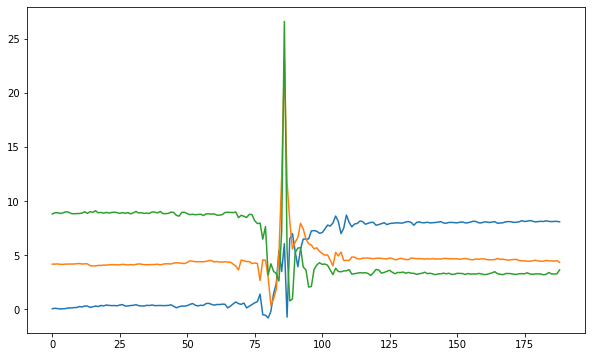

In [28]:
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 9999)
d= pd.read_csv('project/fallA.csv')
plt.figure(figsize=(10,6))
plt.plot(d['X'])
plt.plot(d['Y'])
plt.plot(d['Z'])

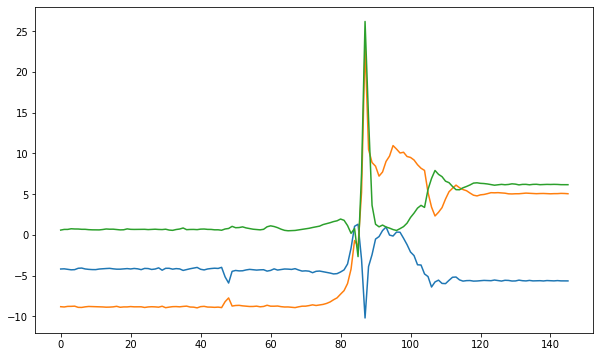

In [29]:
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 9999)
d= pd.read_csv('project/fallS.csv')
plt.figure(figsize=(10,6))
plt.plot(d['X'])
plt.plot(d['Y'])
plt.plot(d['Z'])

In [30]:
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 9999)
d= pd.read_csv('project/stairs1.csv')
plt.figure(figsize=(10,6))
plt.plot(d['X'])
plt.plot(d['Y'])
plt.plot(d['Z'])

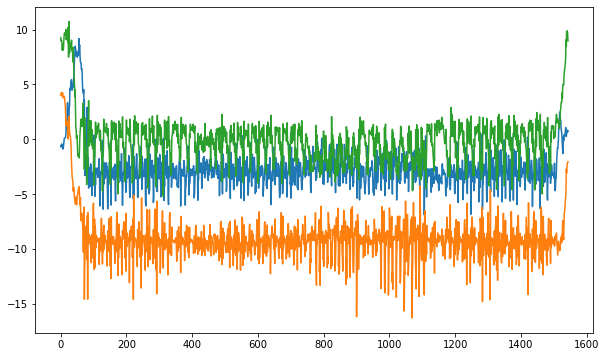

In [31]:
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 9999)
d= pd.read_csv('project/stairs2.csv')
plt.figure(figsize=(10,6))
plt.plot(d['X'])
plt.plot(d['Y'])
plt.plot(d['Z'])